##### LINEAR REGRESSION ON E COMMERCE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

##### GET THE DATA

In [2]:
customers=pd.read_csv(r"C:\Users\Anandhu Subramanian\Downloads\Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


##### CREATE A JOINTPLOT TO COMPARE THE TIME ON WEBSITE AND YEARLY AMOUNT SPENT COLUMNS

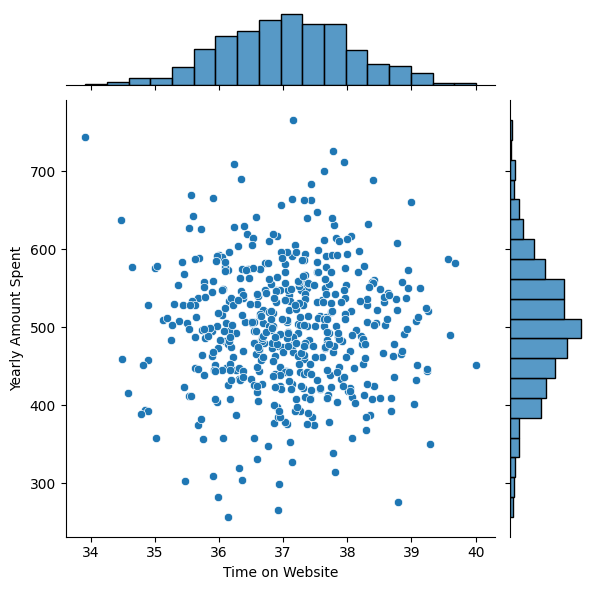

In [6]:
sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers)

##### DO THE SAME BUT WITH TIME ON APP 

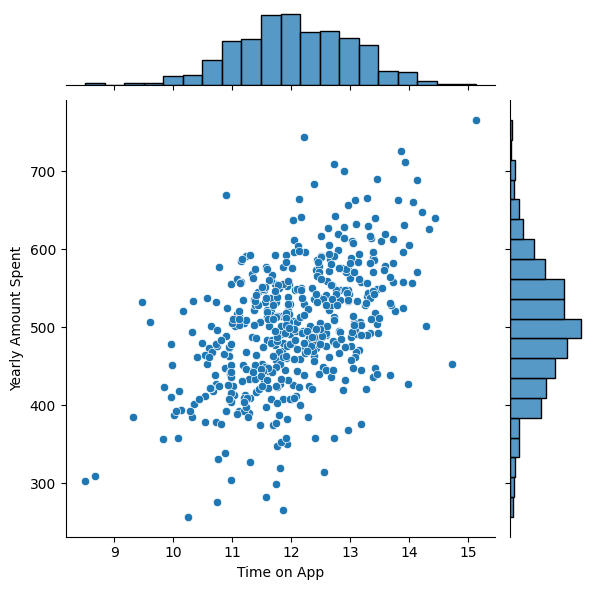

In [7]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = customers)

##### CREATE A LINEAR MODEL PLOT OF YEARLY AMOUNT SPENT VS LENGTH OF MEMBERSHIP

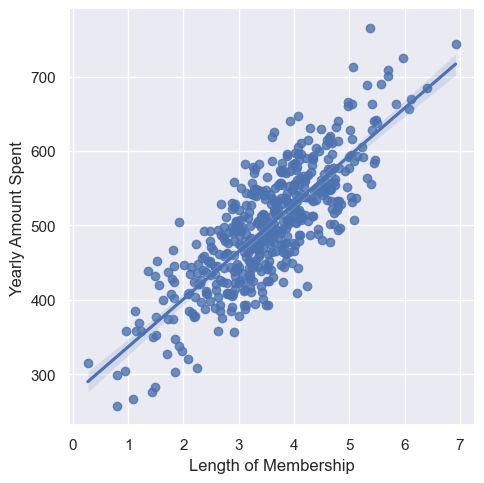

In [9]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

##### TRAINING AND TESTING DATA 

In [10]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [11]:
y= customers['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### TRAINING THE MODEL

In [14]:
from sklearn.linear_model import LinearRegression

##### CREATE AN INSTANCE OF LINEAR REGRESSION()

In [16]:
lm = LinearRegression()

##### TRAIN/FIT lm ON THE TRAINING DATA

In [ ]:
lm.fit(X_train, y_train )

##### PRINTOUT THE COEFFICIENT OF THE MODEL

In [18]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


##### PREDICTING THE TEST DATA

In [19]:
predictions = lm.predict(X_test)

##### CREATE A SCATTERPLOT ON THE REAL TEST VALUES VS THE PREDICTED VALUES

Text(0.5, 0, 'Y test')

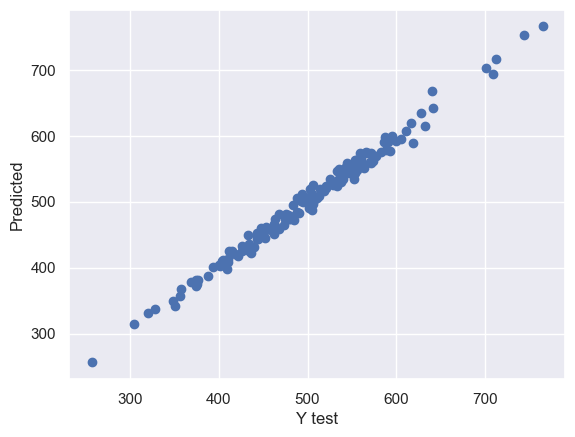

In [20]:
plt.pyplot.scatter(y_test, predictions)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

##### CALCULATE THE MEAN ABSOLUTE ERROR,MEAN SQUARED ERROR AND THE ROOT MEAN SQUARED ERROR

In [21]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


##### PLOT A HISTOGRAM OF THE RESIDUALS AND MAKE SURE IT LOOKS NORMALLY DISTRIBUTED

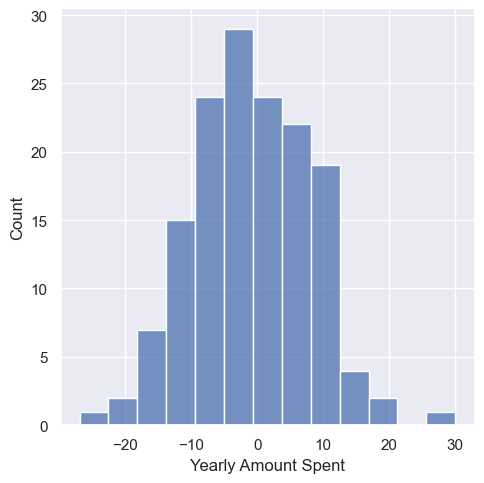

In [25]:
sns.displot((y_test-predictions))

##### CONCLUSION

###### WE STILL HAVE TO FIGURE OUT DO WE FOCUS O MOBILE APP OR WEBSITE DEVELOPMENT ,LETS SEE WE CAN INTERPRET THE COEFFICIENT AT ALL TO GET AN IDEA

##### RECREATE THE DATAFRAME

In [26]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


##### THE COMPANY SHOULD FOCUS ON THE MOBILE APP